# Naive Bayes

## Write your id numbers and names here


1.   Yuval Levi - 325120384
2.   Maxim Katz - 322406604


## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we saw.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```
to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

**Plotting a single sample of each digit as the original image**

In [25]:
from keras.datasets import mnist
from PIL import Image as im
import numpy as np
from IPython.display import Image 

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
for i in range(10):
  idx = list(y_train).index(i)
  mt = np.array(x_train[idx])
  pic = im.fromarray(mt)
  print("label:" + str(i))
  display(pic)

label:0


label:1


label:2


label:3


label:4


label:5


label:6


label:7


label:8


label:9


Reshaping the x data

In [28]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

Showing that the data is splitted to 1/7 test

In [29]:
print("x train:" + str(x_train.shape))
print("x test:" + str(x_test.shape))
print("y train:" + str(y_train.shape))
print("y test:" + str(y_test.shape))

x train:(60000, 784)
x test:(10000, 784)
y train:(60000,)
y test:(10000,)


As we can see from the shape of the data, the data is already splitted for 6/7 trainning data (60000) and 1/7 testing data (10000).

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 
Describe in text (preferably math notationns) the classification rule, and explain.

**Note:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
We classify the images into the given classes by using the Naive Bayes algorithm which is based on Bayesian Probability/Distribution. Therefore, We use Bayesian rules.

There are many Naive Bayes algoritms one of them is Bernouli Naive Bayes. 
When we use Bernouli Naive Bayes, we binarized the inputs to 0 (black) and 1 (white). In order to deal with that each value that is greater than 0 gets 1 and all the 0's stay the same.

The classification rule for NB is the assumption of independent set between the properties of the classified objects when their classification is already known.
The advantage of NB classification methods is their scalability.

We would like to find the probability that image **Xi** belongs to class c given the image and this is the posterior of the model.

We model NB algorithm for the probability of a given pixels **PXi** (28X28) that get the values between 0 to 1 to class a picture **Xi** to class c that represent the numbers between 0 and 9  **P(c/PX1,PX2,...,PX784)** 

For each class we will calculate the propability to this class and the highest probability will be the value of the our picture that we predict: using MAP:
**Cmap(x) = argmax(p(c/PX1,PX2,...PX784))**

In  order to calculate this postirior, we need according the bayes law the prior and the likelihood:
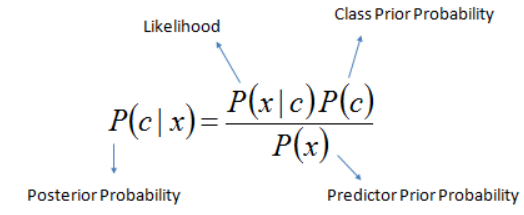

First, We ignore the **P(x)** because we consider him as a constant that doesn't matter us in the propability.  In other words, for each class, we will have the same propability.
In addition, from our assumption of NB we gather that:
**P(x1,x2,....,x784/c) = P(x1/c) X P(x2/c) X P(x3/c) X P(x4/c) X P(x784/c) X P(c)**
This is why the model is naive, as not in all the cases the features are independent.

Therefore, IN GENERAL:

image.png

Second, We calculate **P(c)** for each class, the probability that we will see group c in training data by counting appearances. In other words, we count for each class how many times it appears and divide by the total sum of records:

**Prior = P(с) = count(number of apperance of images digit) / count(total number of images)**

Finally, the likelihood is: **P(PX1/c) X P(PX2/c) X ... X P(PX784/c)** and we can log this multipication to make the calculation easier:
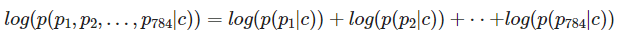

After we calculate, all we just need to do MAP function: **argmax(log(P(Xi/c))**.

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2


*Import NB*

In [30]:
from sklearn.naive_bayes import BernoulliNB

**Running Bernouli Naive Bayes Model**

In [31]:
nb_model = BernoulliNB(binarize = 0)
nb_model.fit(x_train,y_train)
pred = nb_model.predict(x_test)

*1. Plotting Mean Image for each class*

In [32]:
import matplotlib.pyplot as plt

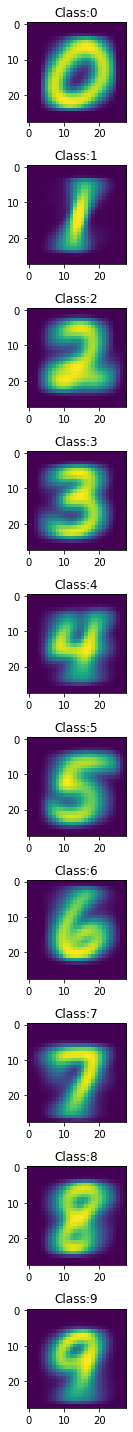

In [33]:

fig, axes = plt.subplots(10, 1, figsize=(20, 20))
for i in range(10):
  axes[i].set_title('Class:' + str(i))
  axes[i].imshow(np.exp2(nb_model.feature_log_prob_[i]).reshape(28,28))
plt.tight_layout()
plt.show()


*2. Calculate Accuracy of our NB Model:*

In [34]:

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))

print("\n\nAccuracy:")
print(accuracy_score(y_test, pred))



Confusion Matrix:
[[ 887    0    4    7    2   41   16    1   22    0]
 [   0 1085   10    5    0    9    6    0   19    1]
 [  19    8  852   29   17    4   32   14   55    2]
 [   5   15   34  844    0   13    9   15   49   26]
 [   2    6    4    0  795    4   21    1   23  126]
 [  23   12    7  129   30  627   16    8   21   19]
 [  18   18   15    2   13   35  851    0    6    0]
 [   1   24   14    4   15    0    0  871   27   72]
 [  16   23   13   76   17   22    7    6  758   36]
 [   9   13    5    9   74    8    0   24   24  843]]


Accuracy:
0.8413


**Explanation:**

We calculated the Confusion Matrix between the test's classes and the predicted classes that has been returned from the classifier of our Naive Bayes Model. 
In this case, In our Matrix we got good results, because of the big amount of pictures classified in our prediction correctly as the test's classes. We infer that by looking on the diagonal. However, in certain cells (all the cells outside of the diagonal) we got a big number of error of the classification. There sum is the total amount of errors of our model. In other words, when the classifier NB predicted class B instead of class A. 

In some reasons, We can conclude that their is a similarity between the classes that have a big number of misclassified pictures. In our Matrix, we can see 126 pictures that misclassified instead of the actual value '9' the NB Model classified the pictures as the value '9'. 

In conclusion, We can try to improve the NB model by given him more example to train on them and distinct between each class (number). As a result of that we can improve the accuracy and make it bigger.

For the accuracy measure we have got a score of: 84.13% Which measures the number of corrected results divided by all the results (positive and negative results both in the prediction and in the test).




*3.Think of a way you can find the optimal threshold of the binarization part: (hyper params tuning):*

**Explanation:**

We thought of a way to improve the parameter of binarization by calculating the accuracy of each threshold from 0 to 255 in intervals of 5 for each image. 

Due to that the model can only have a single parameter of threshold for all the images each time and calculate the acurracy of our model.
In the end, We choose the threshold that gave us the best accuracy for our NB model.

To compare this optimization against the binarization = 0, We will run a simulation of that:

In [35]:
acc = []
for threshold in range(0,255,5):
  nb_model = BernoulliNB(binarize = threshold)
  nb_model.fit(x_train,y_train)
  pred = nb_model.predict(x_test)
  acc.append(accuracy_score(y_test, pred))
nb_model = BernoulliNB(binarize = np.argmax(acc)*5)
nb_model.fit(x_train,y_train)
pred = nb_model.predict(x_test)



In [37]:
print(f'Accuracy with the best threshold : {accuracy_score(y_test, pred)} better than 0.8413')
print(f'Best binarization threshold : {np.argmax(acc)*5} better than threshold=0')

Accuracy with the best threshold : 0.8463 better than 0.8413
Best binarization threshold : 115 better than threshold=0


As we can see we recieve best accuracy score with a binarization parameter = 115.
Improvment of 0.49%.

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


In [38]:
from sklearn.datasets import fetch_20newsgroups

In [39]:
#Downloading data
data_train = fetch_20newsgroups(subset="train", remove = ('headers', 'footers', 'quotes'))
data_test = fetch_20newsgroups(subset="test", remove = ('headers', 'footers', 'quotes'))

#split to train data
x_train = data_train.data
y_train = data_train.target

#split to test data
x_test = data_test.data
y_test = data_test.target

**Naive Bayes implemantaion:**

In [41]:
from sklearn.base import BaseEstimator, ClassifierMixin


class NaiveBayes(BaseEstimator, ClassifierMixin):


  def fit(self, x, y):
    #P(c)
    self.prior = np.bincount(y) / len(y)

    #P(x|c)
    self.voc = x.shape[1] #corpus size
    posts_num = x.shape[0] # count of documents in x
    labels_num = len(self.prior)
    self.labels = {}
    posts_arr = x.toarray()

    for i in range(posts_num):
      label = y[i] 
      post = posts_arr[i]  

      if label not in self.labels.keys():
        self.labels[label] = [0, np.zeros(self.voc)]
  
      for word in range(self.voc):  
        self.labels[label][0] += post[word] # counting number of words in the class
        self.labels[label][1][word] += post[word] # counting number of occurances for each word in the class

    self.proba = {}
    #calculating P(x|c)
    for key in range(labels_num):
      self.proba[str(key)] = (self.labels[key][1] + 1) / (self.labels[key][0] + self.voc)

  def predict_log_proba(self, x):

      prs = []
      posts_num = x.shape[0] # count of documents in x

      # Calculating log probability for each class 
      for i in range(posts_num):
        log_pr = np.zeros(len(self.prior))
        for lbl in range(len(self.prior)):
          lbl_prior = self.prior[lbl]
          label_mult = np.power(self.proba[str(lbl)], x[i])
          log_pr[lbl] = np.log(lbl_prior) + np.sum(np.log(label_mult[label_mult != 0]))
        prs.append(log_pr)

      return prs

  def predict(self, x):
      prs = self.predict_log_proba(x.toarray())
      y_pred = []
      for i in range(x.shape[0]):
        y_pred.append(np.argmax(prs[i]))

      return y_pred

  
  

**Explanation for the model:**

We implemented Naive Bayes Model from beggining.

We implemented the function fit , predict_log_proba and predict.

In the fit function we calcualted P(Wi/C) and P(C). We used the formula of 
 
P(Wi/C) = (count(wi,c)+1)/(count(c)+|V|) where count(w,c) is the count of apperances of a word in a specific class.

count(c) - total number of words in class.

|V| - size of vocaublary.

We also calcualted P(C) = (# of words in the class)/(# of total words)
for the probability of a class in th data.

We implement the predict_log_proba by calculating the probabilty of words given the class in the document - P(W1,W2,...Wn/C)
for each class, P(W1/C) * P(W2/C) * P(W3/C) * ... * P(Wn/C)

we calculated the log probabilty beacuse we get better results by doing it and it was explained.

We implement the predict function where we calculated the predicted class by doing for each class his probability and taking the class that has the highest probabilty.

**Applying our model**

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer 

pipe = make_pipeline(CountVectorizer(stop_words='english', max_features= 3000), NaiveBayes())

#Fit
pipe.fit(x_train, y_train)

#Predict
y_pred = pipe.predict(x_test)

Calculating the Accuracy of our model

In [43]:
#Accuracy
acc = accuracy_score(y_test, y_pred)
print('The Accuracy score is: ' + str(acc))
print("classification report:")
print(classification_report(y_test, y_pred))

The Accuracy score is: 0.5569569835369091
classification report:
              precision    recall  f1-score   support

           0       0.37      0.47      0.41       319
           1       0.46      0.64      0.54       389
           2       0.50      0.00      0.01       394
           3       0.45      0.60      0.51       392
           4       0.51      0.60      0.55       385
           5       0.68      0.62      0.65       395
           6       0.74      0.72      0.73       390
           7       0.59      0.67      0.63       396
           8       0.60      0.67      0.63       398
           9       0.63      0.73      0.68       397
          10       0.46      0.60      0.52       399
          11       0.79      0.61      0.69       396
          12       0.51      0.49      0.50       393
          13       0.69      0.60      0.64       396
          14       0.74      0.57      0.64       394
          15       0.53      0.65      0.59       398
          16    

**Comparing our model to Multinomial Naive Bayes**

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:

pipe = make_pipeline(CountVectorizer(stop_words='english', max_features= 3000), MultinomialNB())

#Fit
pipe.fit(x_train, y_train)

#Predict
y_pred = pipe.predict(x_test)

Calculating the Accuracy of Multinomial Naive Bayes model

In [46]:
#Accuracy
acc = accuracy_score(y_test, y_pred)
print('The Accuracy score is: ' + str(acc))

The Accuracy score is: 0.5574880509824748


As we can see while running the two models with the CounterVectorizer we recieved almost the same results of accuracy. Our model recieved accuracy level of 55.74%.

**Applying our model but now with TfidfVectorizer**

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [48]:

pipe = make_pipeline(TfidfVectorizer(stop_words='english', max_features= 3000), NaiveBayes())

#Fit
pipe.fit(x_train, y_train)

#Predict
y_pred = pipe.predict(x_test)

Calculating the Accuracy of our model

In [49]:
#Accuracy
acc = accuracy_score(y_test, y_pred)
print('The Accuracy score is: ' + str(acc))

The Accuracy score is: 0.6233404142326076


**Comparing our model to Multinomial Naive Bayes but now with TfidfVectorizer**

In [50]:
pipe = make_pipeline(TfidfVectorizer(stop_words='english', max_features= 3000), MultinomialNB())

#Fit
pipe.fit(x_train, y_train)

#Predict
y_pred = pipe.predict(x_test)

Calculating the Accuracy of Multinomial Naive Bayes model

In [51]:
#Accuracy
acc = accuracy_score(y_test, y_pred)
print('The Accuracy score is: ' + str(acc))

The Accuracy score is: 0.6233404142326076


As we can see while running the two models with the TfidfVectorizer we recieved identical results of accuracy. The two model have an accuracy level of 62.33%.

**Plotting the learning curve**

In [53]:
from sklearn.model_selection import learning_curve

pipe = make_pipeline(CountVectorizer(stop_words='english', max_features= 3000), NaiveBayes())

size, tr_score, tst_score = learning_curve(pipe, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

tr_mean = np.mean(tr_score, axis=1)
tr_std = np.std(tr_score, axis=1)

tst_mean = np.mean(tst_score, axis=1)
tst_std = np.std(tst_score, axis=1)

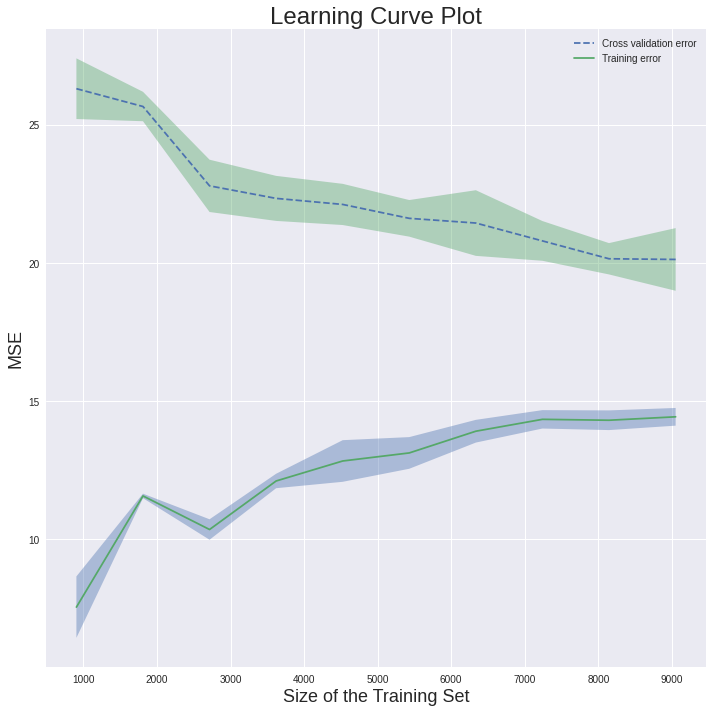

In [55]:
plt.style.use('seaborn')
plt.subplots(1, figsize=(10,10))

plt.plot(size, -tst_mean, '--', label="Cross validation error")
plt.plot(size, -tr_mean,  label="Training error")

plt.fill_between(size, -(tr_mean - tr_std), -(tr_mean + tr_std), alpha=0.4)
plt.fill_between(size, -(tst_mean - tst_std), -(tst_mean + tst_std), alpha=0.4)
plt.title("Learning Curve Plot", fontsize = 24, y = 1)
plt.xlabel("Size of the Training Set", fontsize = 18), plt.ylabel("MSE", fontsize = 18), plt.legend(loc="best")
plt.tight_layout()
plt.show()

 *Explanation:* Learning Curve usually refers to a plot of the prediction vs. the training set - we measure how good the model get at predicting the target as you increase the number of instances used to train it and how it effects the model's performance. In order to evaluate the model we trained on more data samples, We expect that the error score of the cross-validation will decrease, the error on the will stay pretty low and the error level of both training and validation sets will get closer to each other, as a result of good bias-variance trade-off. 

*Analyzes:* From the plot, we can see that our training error is low but at the beggining higher than the error on the cross validation and the distance between the differences of the error values, as we increase the amount of samples in training, get closer. In more samples the error on the cross validation will be higher than the error on the training set. As we can infer, our model fits the data training pretty well and indicates a model that is closer to being overfitting than underfitting. This means we have a low bias and high variance.

**In conclusion, We can see that as we train the model on more data samples the cross validation error score decreasing so our model is in the variance regime.**

**Optimize performance in respect to vectorizer hyper parameters**

In [ ]:
pipe = make_pipeline(CountVectorizer(stop_words='english',max_features= 3000, max_df= 400), NaiveBayes())

#Fit
pipe.fit(x_train, y_train)

#Predict
y_pred = pipe.predict(x_test)

In [ ]:
#Accuracy
acc = accuracy_score(y_test, y_pred)
print('The Accuracy score is: ' + str(acc))

The Accuracy score is: 0.5716941051513542


We can see that when we limited the max_df to 400 we get an Accuracy score of 0.5716(57.16%), about 1.5% more accurate than without limiting the max_df(55.69%)


#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [ ]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  mid_color='\x1b[45;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [ ]:
# Implementationn goes here
def calc_p_c_given_xi(model):
  prior = np.exp(model.class_log_prior_) #P(c)
  prob = np.exp(model.feature_log_prob_) #P(xi|c)

  px = np.sum(np.multiply(prior,prob.T)) #P(x)

  ret = []
  for i in range(len(prior)):
      ret.append(prior[i]*prob[i]/px)

  return ret

In [ ]:
pipe = make_pipeline(TfidfVectorizer(stop_words='english', max_features= 3000), MultinomialNB())
pipe.fit(x_train, y_train)

model = pipe.get_params()['multinomialnb']
features = pipe.get_params()['tfidfvectorizer'].get_feature_names_out()

prs = calc_p_c_given_xi(model)

limits_lst = []
for pr in prs:
  limits_lst.append(np.average(pr))

limit = np.average(limits_lst)

hot, cold = [], []

for x in range(len(prs)):
  for y in range(len(prs[x])):
    if prs[x][y] > limit:
      if features[y] not in hot:
        hot.append(features[y])
    else:
      if features[y] not in cold:
        cold.append(features[y])

In [ ]:
print_txt(x_train[1], hot, cold)

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.


When we use our methods, we get the affect by the probability of each word in each document. We classify by a mean threshold of all the probabilities of all documents, that we can classify for hot and cold words. (less than threshold is cold and bigger threshold is hot).

#### Think and describe:
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

***Answer:***

There are several ways we can correct the analyzed error after running it. 

In Regression, The coefficients are not comparable directly unless the features have been standardized, since one unit of different features can refer to very different things. 

In Naive Bayes, instead of giving the model to learn the prior P(Xi/C) during the training, the contribution of an individual feature value can be easily measured by the posterior, P(C/Xi) = P(Xi/C)*P(C)/P(X) and choose only features that are affecting our model more than others.

In Random Forest, because the decision paths in all the trees are well tracked, we can use the difference between the mean value of data points in a parent node between that of a child node to approximate the contribution of this split.

Also, We can try to collect more data to get a bigger sample size for a better accuracy or we can try add more hyper parameters parameters for the model and try to see if the new model gets better results, in order to affect the variance - bias tradeoff by tuning the paramethers of the model.
